In [6]:
import nibabel as nib
import numpy as np
import glob

# Liste des fichiers NIfTI à fusionner
file_list = glob.glob(r'/NAS/tupac/protocoles/PULSE/DTI/FA/*_onMNI.nii.gz')

# Initialiser une variable pour accumuler la somme des images
sum_image = None

# Lire chaque fichier et accumuler la somme
for file in file_list:
    img = nib.load(file)
    img_data = img.get_fdata()

    if sum_image is None:
        sum_image = np.zeros_like(img_data, dtype=np.float32)

    sum_image += img_data

# Calculer la moyenne
mean_image_data = sum_image / len(file_list)

# Créer une nouvelle image NIfTI pour la moyenne
mean_img = nib.Nifti1Image(mean_image_data, img.affine, img.header)

# Sauvegarder l'image moyenne
nib.save(mean_img, r'/NAS/tupac/protocoles/PULSE/DTI/FA/mean_image.nii.gz')


In [13]:
import nibabel as nib
import numpy as np
import glob

# Liste des fichiers NIfTI à fusionner
file_list = glob.glob(r'/NAS/coolio/protocoles/CINOCIS/BIDS/derivatives_v2.0/template_PAM50/sub-*/ses-*/sub-*_ses-M*_dwi_fa_on_PAM50.nii.gz')

# Initialiser une variable pour accumuler la somme des images
sum_image = None

# Lire chaque fichier et accumuler la somme
for file in file_list:
    img = nib.load(file)
    img_data = img.get_fdata()

    if sum_image is None:
        sum_image = np.zeros_like(img_data, dtype=np.float32)

    sum_image += img_data

# Calculer la moyenne
mean_image_data = sum_image / len(file_list)

# Créer une nouvelle image NIfTI pour la moyenne
mean_img = nib.Nifti1Image(mean_image_data, img.affine, img.header)

# Sauvegarder l'image moyenne
nib.save(mean_img, r'/NAS/coolio/protocoles/CINOCIS/BIDS/derivatives_v2.0/mean_image_FA_onPAM50.nii.gz')


In [10]:
file_list

[]

Traitement du fichier 1/3: /NAS/coolio/protocoles/CINOCIS/BIDS/sub-012/ses-M3/anat/sub-012_ses-M3_acq-1001DTICOROSPINE2D_dwi_fa_recM3onM6_warped.nii.gz


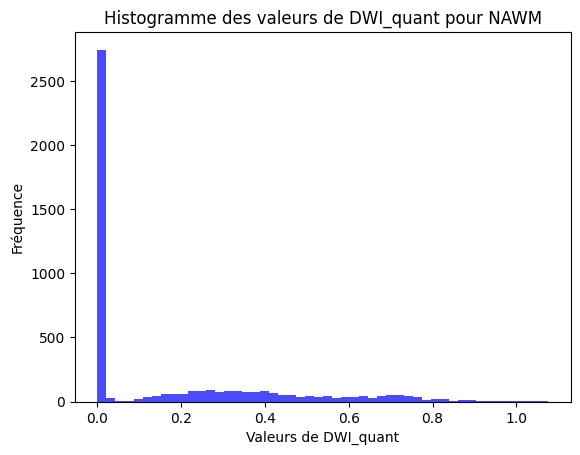

Moyenne pour NAWM : 0.42016802101577927
Moyenne pour lesion : 0.16661978925287488
Traitement du fichier 2/3: /NAS/coolio/protocoles/CINOCIS/BIDS/sub-012/ses-M3/anat/sub-012_ses-M3_acq-1001DTICOROSPINE2D_dwi_adc_recM3onM6_warped.nii.gz


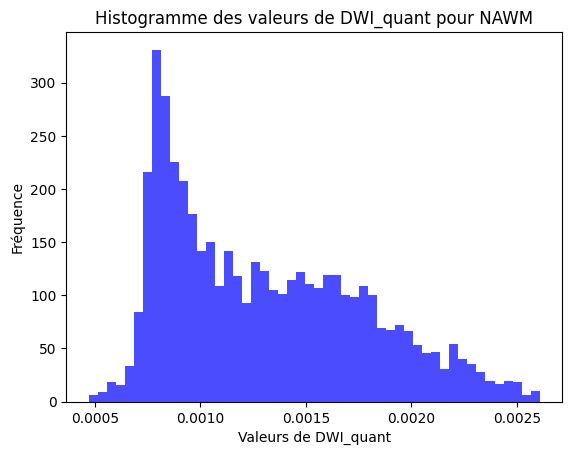

Moyenne pour NAWM : 0.0013034526001927064
Moyenne pour lesion : 0.001991432380272015
Traitement du fichier 3/3: /NAS/coolio/protocoles/CINOCIS/BIDS/sub-012/ses-M3/anat/sub-012_ses-M3_acq-1001DTICOROSPINE2D_dwi_ad_recM3onM6_warped.nii.gz


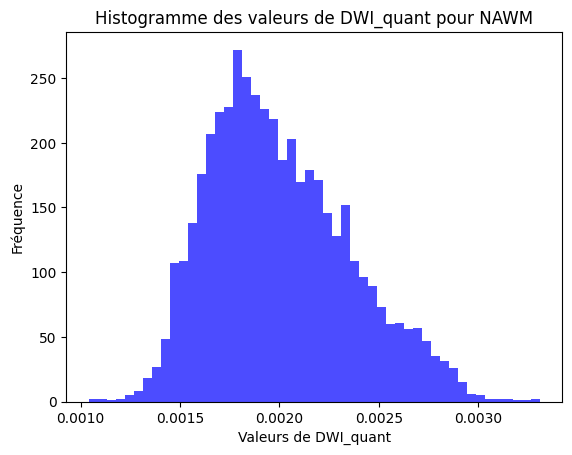

Moyenne pour NAWM : 0.002003462464409655
Moyenne pour lesion : 0.0024077127431441363


In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Liste des chemins des fichiers
file_paths = [    
    r'/NAS/coolio/protocoles/CINOCIS/BIDS/sub-012/ses-M3/anat/sub-012_ses-M3_acq-1001DTICOROSPINE2D_dwi_fa_recM3onM6_warped.nii.gz',
    r'/NAS/coolio/protocoles/CINOCIS/BIDS/sub-012/ses-M3/anat/sub-012_ses-M3_acq-1001DTICOROSPINE2D_dwi_adc_recM3onM6_warped.nii.gz',
    r'/NAS/coolio/protocoles/CINOCIS/BIDS/sub-012/ses-M3/anat/sub-012_ses-M3_acq-1001DTICOROSPINE2D_dwi_ad_recM3onM6_warped.nii.gz',
    r'/NAS/coolio/protocoles/CINOCIS/BIDS/derivatives_v2.0/sct_4.3_fused2/sub-012/ses-M6/sub-012_ses-M6_acq-801T2W_SPAIR2D_T2w_masklesioncervicalcord_eroded.nii.gz',
    r'/NAS/coolio/protocoles/CINOCIS/BIDS/derivatives_v2.0/sct_4.3_fused2/sub-012/ses-M6/sub-012_ses-M6_acq-801T2W_SPAIR2D_T2w_masklesioncervicalcord_dilated.nii.gz',
    r'/NAS/coolio/protocoles/CINOCIS/BIDS/derivatives_v2.0/sct_4.3_fused2/sub-012/ses-M6/seg_cerv_rpi_labeled_eroded.nii.gz'
]

# Lire les fichiers avec nibabel
#images = [ for file_path in file_paths]
# Soustraire l'image '801T2W_SPAIR2D_T2w_masklesioncervicalcord_dilated' de 'seg_cerv_rpi_labeled_eroded'
dilated_les = nib.load('/NAS/coolio/protocoles/CINOCIS/BIDS/derivatives_v2.0/sct_4.3_fused2/sub-012/ses-M6/sub-012_ses-M6_acq-801T2W_SPAIR2D_T2w_masklesioncervicalcord_dilated.nii.gz').get_fdata()
eroded_les = nib.load('/NAS/coolio/protocoles/CINOCIS/BIDS/derivatives_v2.0/sct_4.3_fused2/sub-012/ses-M6/sub-012_ses-M6_acq-801T2W_SPAIR2D_T2w_masklesioncervicalcord_eroded.nii.gz').get_fdata()
segmented_vert = nib.load('/NAS/coolio/protocoles/CINOCIS/BIDS/derivatives_v2.0/sct_4.3_fused2/sub-012/ses-M6/seg_cerv_rpi_labeled_eroded.nii.gz').get_fdata()


# Ne garder que les labels 3 à 6 dans dilated_img
filtered_vert_data = np.where((segmented_vert >= 3) & (segmented_vert <= 6), 1, 0)
result_vertminusles_data = filtered_vert_data - dilated_les

# Afficher des informations sur chaque fichier chargé
for i, img in enumerate(file_paths[0:3]):
    print(f"Traitement du fichier {i+1}/{len(file_paths[0:3])}: {img}")
    DWI_quant = nib.load(img).get_fdata()
    # Calculer la moyenne de DWI_quant pour les voxels dans filtered_vert_data
    import matplotlib.pyplot as plt

    # Afficher l'histogramme
    plt.hist(DWI_quant[filtered_vert_data == 1], bins=50, color='blue', alpha=0.7)
    plt.title("Histogramme des valeurs de DWI_quant pour NAWM")
    plt.xlabel("Valeurs de DWI_quant")
    plt.ylabel("Fréquence")
    plt.show()

    mean_filtered_vert = np.mean(DWI_quant[(filtered_vert_data == 1) & (DWI_quant != 0)])
    DWI_quant[eroded_les == 1]
    # Calculer la moyenne de DWI_quant pour les voxels dans result_vertminusles_data
    mean_lesion = np.mean(DWI_quant[eroded_les == 1] & (DWI_quant != 0)])
    
    print(f"Moyenne pour NAWM : {mean_filtered_vert}")
    print(f"Moyenne pour lesion : {mean_lesion}")
    
